## LGM VIRTUAL INTERNSHIP PROGRAM

### Prediction Using Decision Tree Algorithm

### Task 2

### Author- Vivek R Nair

### Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("Iris.csv")

### Exploratory Data Analysis on Dataset

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.shape

(150, 6)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df = iris_df.drop(columns="Id", axis=1)

#### Checking for null values in the dataset

In [9]:
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset

#### Plotting the distribution of the dataset

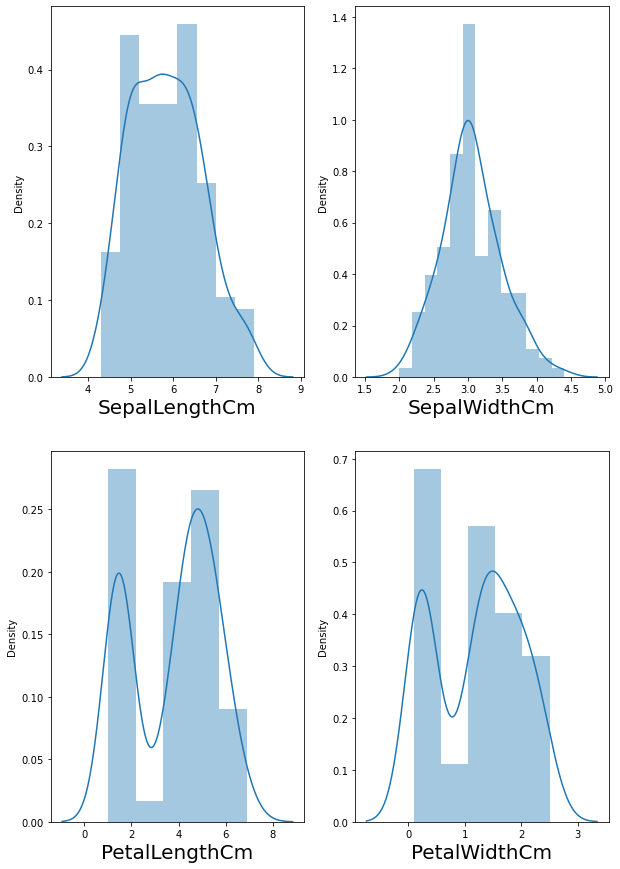

In [10]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in iris_df:
    if plotnumber<=4 :   
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(iris_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Checking for outliers

<AxesSubplot:>

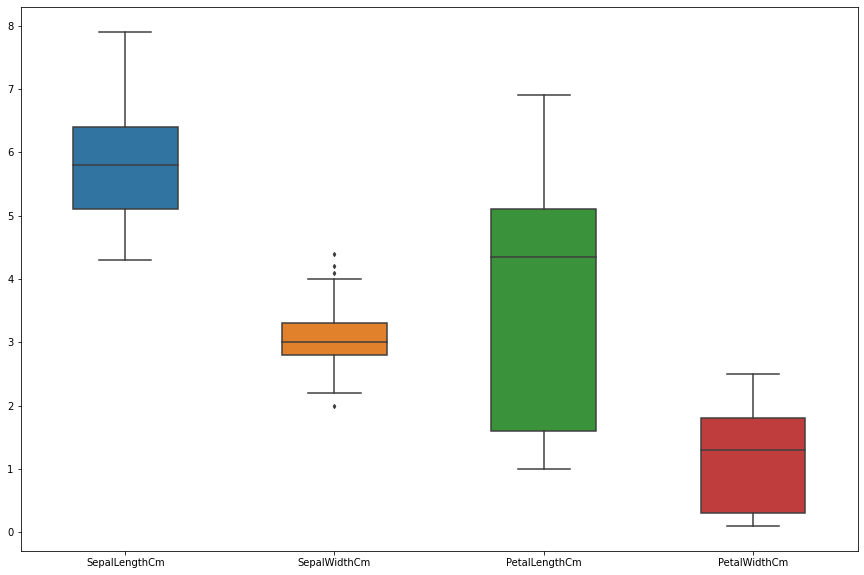

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=iris_df, width= 0.5,ax=ax,  fliersize=3)

<AxesSubplot:>

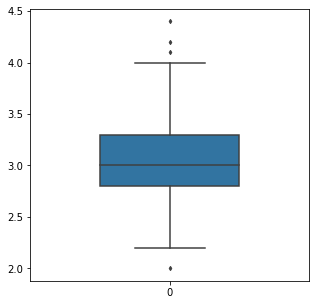

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=iris_df["SepalWidthCm"], width= 0.5,ax=ax,  fliersize=3)

We can notice some outliers in the Sepal Width column

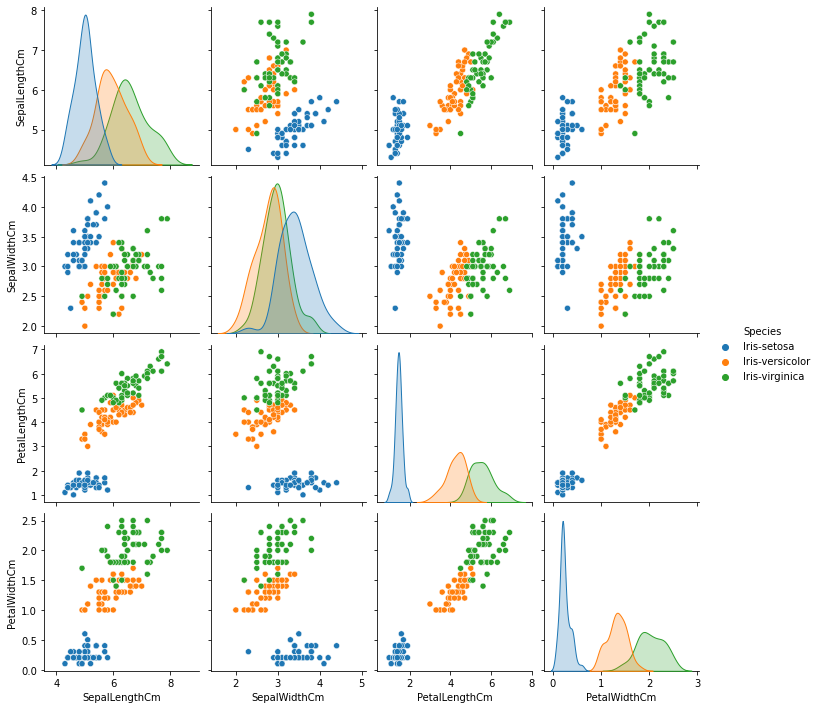

In [13]:
sns.pairplot(data = iris_df, hue="Species")
plt.show()

#### Checking the correlation of the features

In [14]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


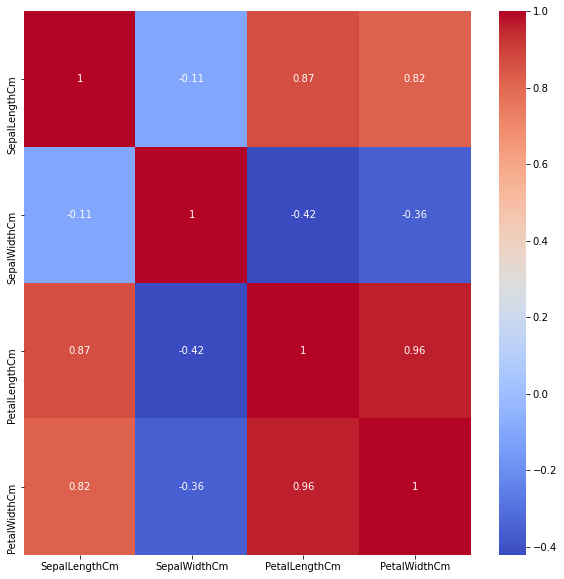

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data=iris_df.corr(),annot=True, cmap="coolwarm" )
plt.show()

We can see that the Petal Length and Petal Width are highly correlated positively

### Performing the split on the dataset

In [16]:
X = iris_df.drop("Species", axis=1)
y= iris_df["Species"]

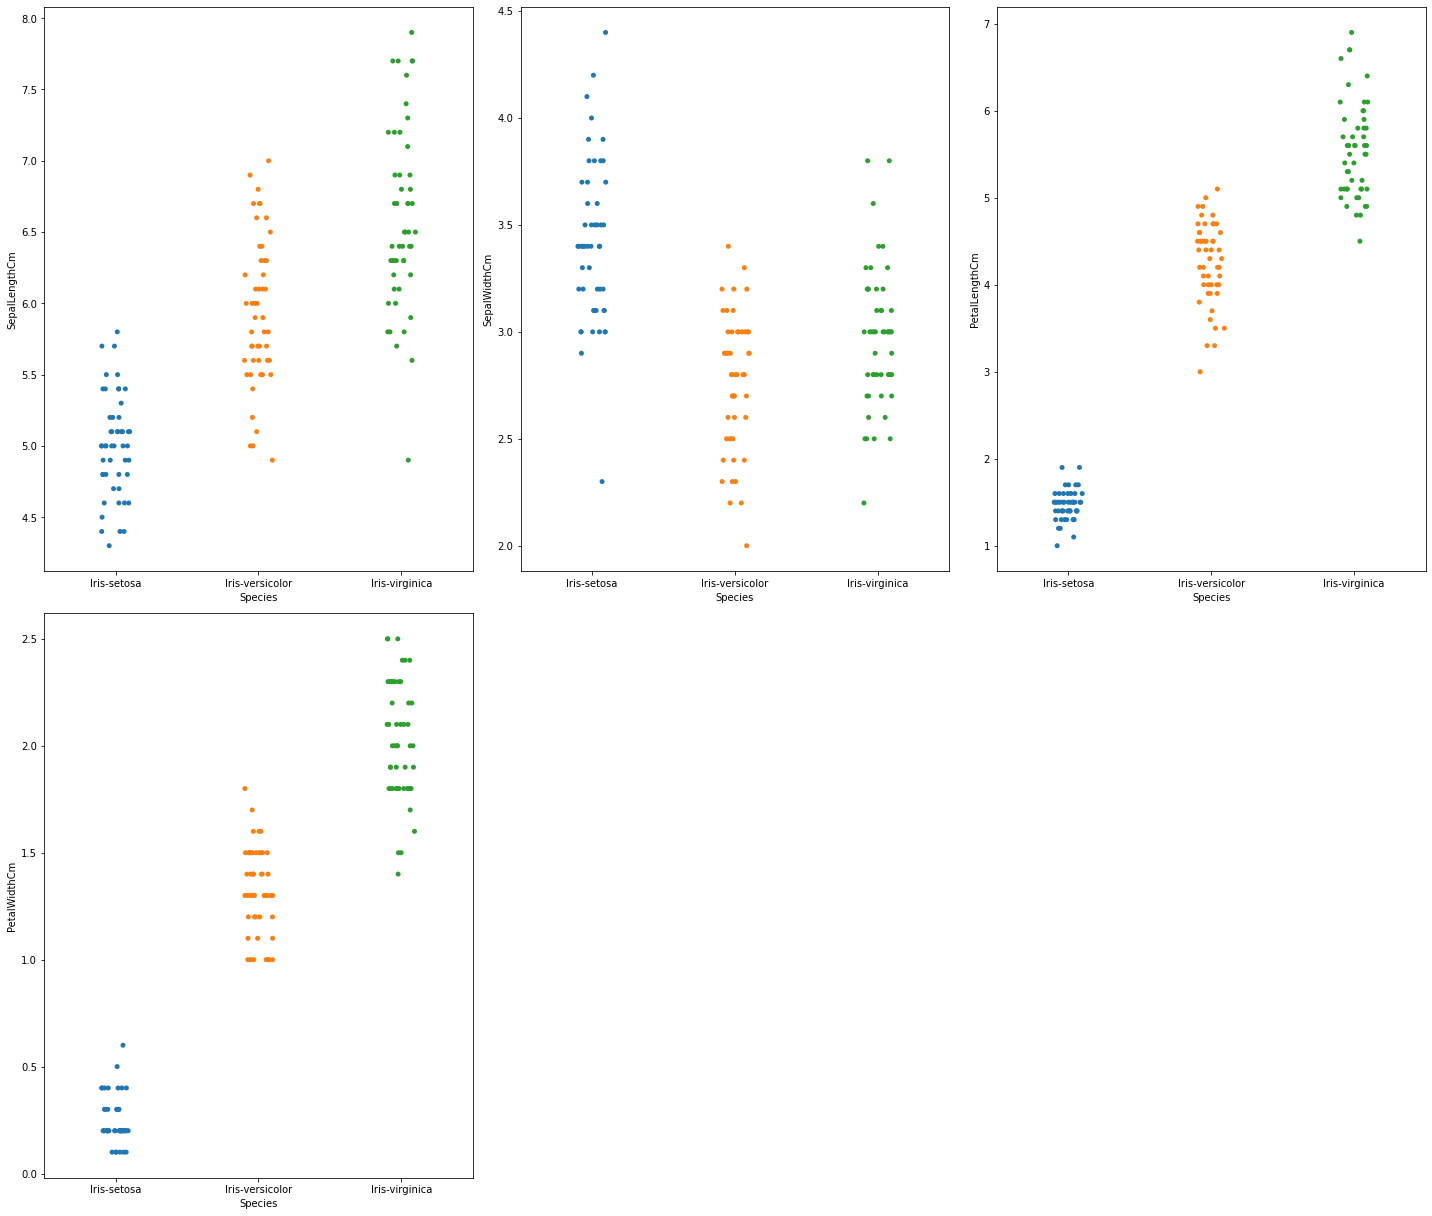

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

##### Encoding the target variable

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

##### Performing the Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 5)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


#### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( random_state = 20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
pd.DataFrame({"Actual Result":y_test, "Predicted Result":y_pred} ).head()

,Actual Result,Predicted Result
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.95

In [26]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat


array([[20,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 18]], dtype=int64)

In [27]:
classifier.score(X_train,y_train)

1.0

In [28]:
classifier.score(X_test,y_test)

0.95

##### Cross Validation 

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [31]:
grid_search = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=20,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}


In [37]:
classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 1, min_samples_split=6, splitter ='random',random_state = 20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='random')

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
pd.DataFrame({"Actual Result":y_test, "Predicted Result":y_pred} ).head()

,Actual Result,Predicted Result
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2


In [48]:
classifier.score(X_train,y_train)

0.9666666666666667

In [41]:
classifier.score(X_test,y_test)

0.9833333333333333

In [42]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat


array([[20,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 19]], dtype=int64)

In [44]:
from sklearn import tree

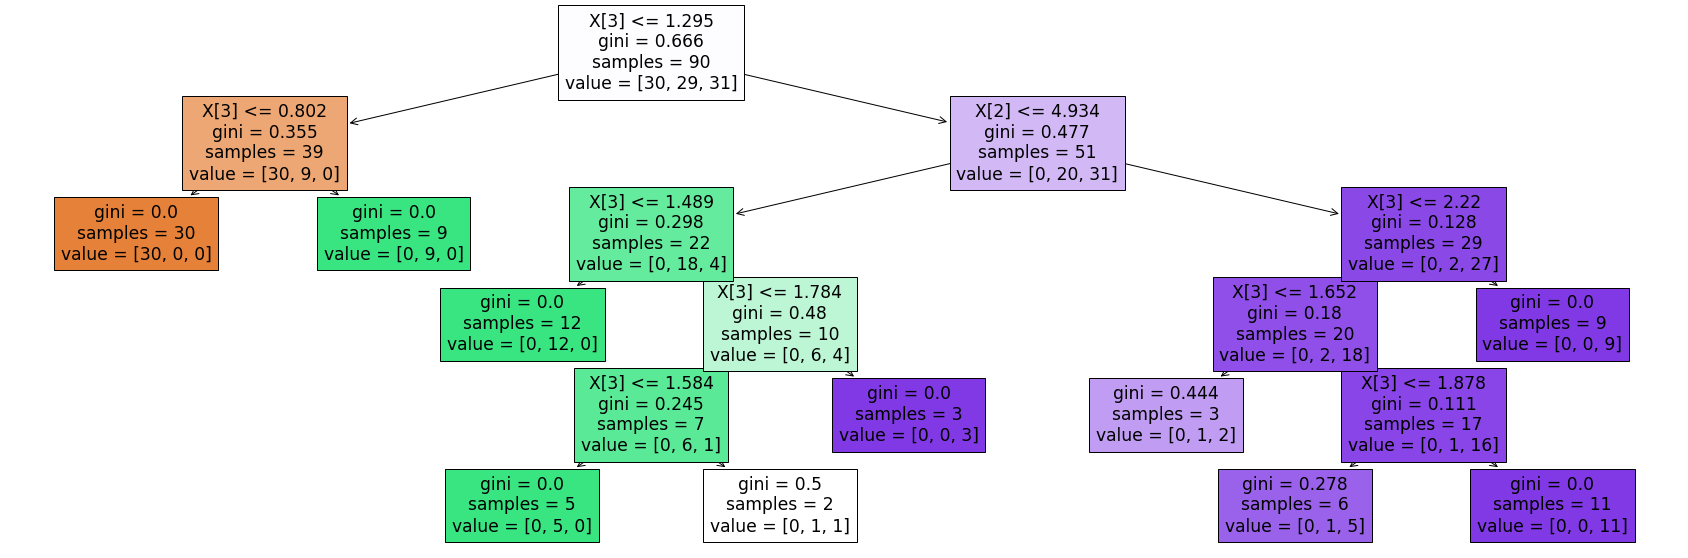

In [45]:
plt.figure(figsize = (30,10))
tree.plot_tree(classifier, filled = True)
plt.show()

## THANK YOU !!!